### 簡単な画像認識（step1）減色化＋ヒストグラム

<class 'numpy.ndarray'>
[[  187 12390  2867   940   583 11705  3231   865   477 10249  4667   991
      0]
 [ 3901  7207  4435   841  2008  8299  4665  1412  1085  9010  4977  1312
      0]
 [ 1620  6778  5718  2268  1753  8739  5065   827  1555  5463  7195  2171
      0]
 [  858 10647  4855    24  1548  7890  6921    25  1648  7723  6970    43
      0]
 [  220  4448  8672  3044   686  5878  7878  1942   493  4065  6682  5144
      0]
 [ 3092  6200  2568  4524  1746  7194  3153  4291   215  8709  1538  5922
      1]
 [ 5661  7818  1521  1384  4702  6868  3347  1467  4793  8001  2029  1561
      1]
 [ 4973  7595  3163   653  4365  6409  3034  2576  4396  7216  3343  1429
      1]
 [ 7988  6165  1919   312  7497  4035  4216   636  7443  5116  3201   624
      1]
 [ 5750  6680  3773   181  5102  4299  6273   710  5291  5085  5464   544
      1]]


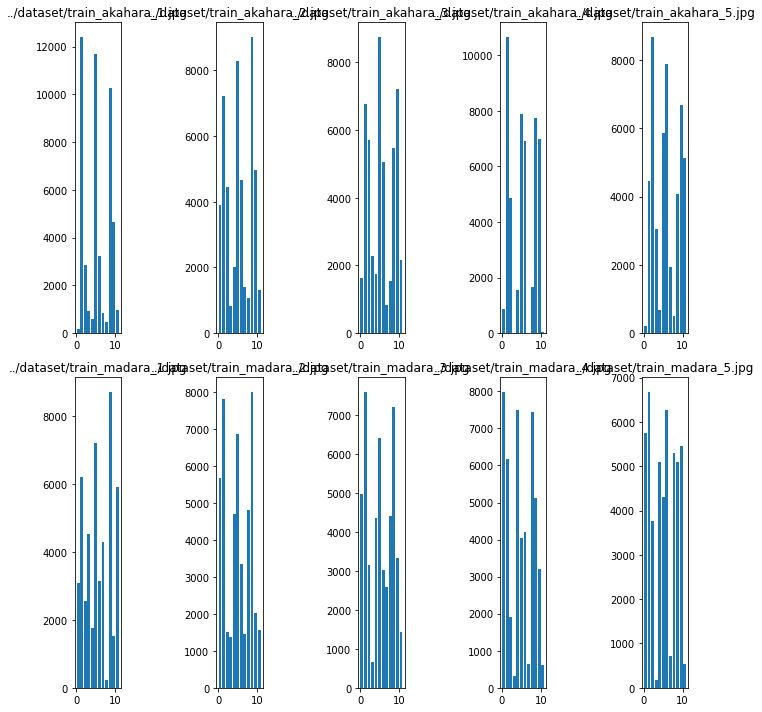

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

%matplotlib inline

## dicrease color
def dic_color(img):
    img //= 64  # answerだと63だったけど、そうすると 次の処理で255を超える値ができてしまう
    img = img*64 + 32
    return img

def get_DB():
    # get image paths
    train = glob("../dataset/train_*")
    train.sort()  # これは何のため
    
    # prepare database
    db = np.zeros((len(train), 13), dtype=np.int32)  # ヒストグラムなので整数型で良い
    fig,ax = plt.subplots(2,5,figsize=(10,10))
    print(type(ax))
    
    # each　image
    for i, path in enumerate(train):
        img = dic_color(cv2.imread(path))
        # get histogram
        for j in range(4):  # ６３で割っていた場合ここでj=4のときの値は落とされてしまうので数が少なくなる
            db[i, j] = len(np.where(img[..., 0] == (64 * j + 32))[0])
            db[i, j+4] = len(np.where(img[..., 1] == (64 * j + 32))[0])
            db[i, j+8] = len(np.where(img[..., 2] == (64 * j + 32))[0])
            
        # get class
        if 'akahara' in path:
            cls = 0
        elif 'madara' in path:
            cls = 1
            
        # store class label
        db[i, -1] = cls
        
    
        
        img_h = img.copy() // 64  # 0,1,2,3のいずれかになる
        img_h[..., 1] += 4
        img_h[..., 2] += 8
        plt.subplot(2, 5, i+1)
        ax = plt.gca()
        ax.hist(img_h.ravel(), bins=12, rwidth=0.8)
        ax.set_title(path)
        
    print(db)
    plt.tight_layout()
    plt.show()
    
    
get_DB()

[[  172 12254  2983   975   485 11576  3395   928   387 10090  4845  1062
      0]
 [ 3627  7350  4420   987  1743  8438  4651  1552   848  9089  4979  1468
      0]
 [ 1646  6547  5807  2384  1715  8502  5233   934  1553  5270  7167  2394
      0]
 [  749 10142  5465    28  1431  7922  7001    30  1492  7819  7024    49
      0]
 [  927  4197  8581  2679   669  5689  7959  2067   506  3973  6387  5518
      0]
 [ 2821  6404  2540  4619  1625  7317  3019  4423   225  8635  1591  5933
      1]
 [ 5575  7831  1619  1359  4638  6777  3553  1416  4675  7964  2176  1569
      1]
 [ 4867  7523  3275   719  4457  6390  3049  2488  4328  7135  3377  1544
      1]
 [ 7881  6160  1992   351  7426  3967  4258   733  7359  4979  3322   724
      1]
 [ 5638  6580  3916   250  5041  4185  6286   872  5226  4930  5552   676
      1]]


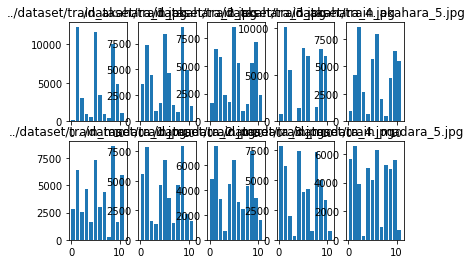

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

## Dicrease color
def dic_color(img):
    img //= 63
    img = img * 64 + 32
    return img

## Database
def get_DB():
    # get image paths
    train = glob("../dataset/train_*")
    train.sort()

    # prepare database
    db = np.zeros((len(train), 13), dtype=np.int32)

    # each image
    for i, path in enumerate(train):
        img = dic_color(cv2.imread(path))
        # get histogram
        for j in range(4):
            db[i, j] = len(np.where(img[..., 0] == (64 * j + 32))[0])
            db[i, j+4] = len(np.where(img[..., 1] == (64 * j + 32))[0])
            db[i, j+8] = len(np.where(img[..., 2] == (64 * j + 32))[0])

        # get class
        if 'akahara' in path:
            cls = 0
        elif 'madara' in path:
            cls = 1

        # store class label
        db[i, -1] = cls

        img_h = img.copy() // 64  # 0,1,2,3のいずれかになる
        img_h[..., 1] += 4
        img_h[..., 2] += 8
        plt.subplot(2, 5, i+1)
        plt.hist(img_h.ravel(), bins=12, rwidth=0.8)
        plt.title(path)

    print(db)
    plt.show()

# get database
get_DB()

In [17]:
a = 255
a //= 64
a

3

In [18]:
a = 255
a // 64
a

255